In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pylab as plt

In [68]:
df = pd.read_csv("https://open-data.s3.filebase.com/insurance.csv")

# Exploratory Data Analysis

In [69]:
df=df.dropna(axis=0) #drop nan value in dataframe
df.shape #show the number of data rows and columns

(1338, 7)

In [70]:
df.head()# show the first five rows of datasets

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
df.describe() # displays the percentile, mean, count and std inforamtion about dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
df.info() #show the information and types of each columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


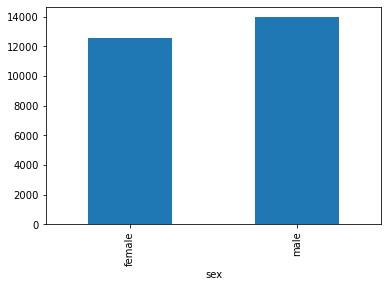

In [75]:
sex_mean=df.groupby('sex').mean()['charges'] #shows the mean charges of each sex
sex_mean.plot.bar()

In [83]:
#male get higher mean charges than female

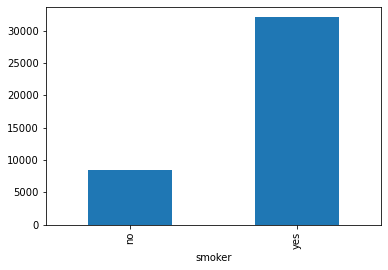

In [76]:
smoker_mean=df.groupby('smoker').mean()['charges'] #shows the mean charges of wheter smoker
smoker_mean.plot.bar()

In [ ]:
# Smoker get higher chargers than none-smoker

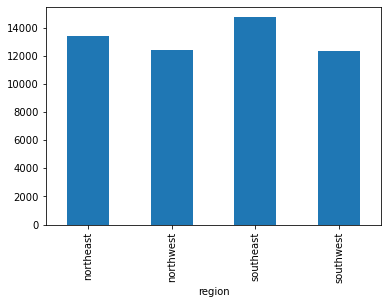

In [91]:
region_mean=df.groupby('region').mean()['charges'] #shows the mean charges of each region
region_mean.plot.bar()

([<matplotlib.patches.Wedge at 0x28171dba220>,
 [Text(0.7967552650119277, 0.7584069143116859, 'northeast'),
  Text(-0.7201693465997107, 0.8314782692398798, 'northwest'),
  Text(-0.7967553005155169, -0.7584068770128791, 'southeast'),
  Text(0.7949722811641255, -0.7602756553913236, 'southwest')],
 [Text(0.4345937809155969, 0.413676498715465, '24.22%'),
  Text(-0.3928196435998421, 0.45353360140357074, '24.29%'),
  Text(-0.43459380028119104, -0.4136764783706613, '27.20%'),
  Text(0.43362124427134113, -0.414695812031631, '24.29%')])

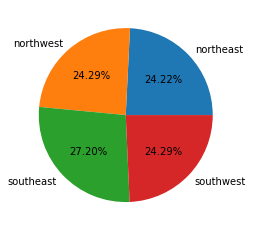

In [92]:
region_count=df.groupby('region').count()['charges'] #shows the mean charges of each region
plt.pie(region_count,labels=region_count.index,autopct='%1.2f%%')

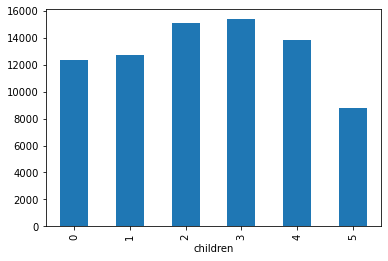

In [78]:
children_mean=df.groupby('children').mean()['charges'] # shows the mean charges of different number of children
children_mean.plot.bar()

In [ ]:
# An intersting try. how about combine the features with highest charges? Choose clients who are smoker, male, comes from southeast and has 3 childern

In [107]:
highest_mean=df[(df['children']==3)&(df['region']=='southeast')&(df['smoker']=='yes')&(df['sex']=='male')]
highest_mean

,age,sex,bmi,children,smoker,region,charges
69,28,male,23.98,3,yes,southeast,17663.1442
265,46,male,42.35,3,yes,southeast,46151.1245
312,43,male,35.97,3,yes,southeast,42124.5153
730,35,male,24.42,3,yes,southeast,19361.9988
1111,38,male,38.39,3,yes,southeast,41949.2441


In [108]:
highest_mean['charges'].mean()

33450.00538

In [95]:
df['charges'].mean()

13270.422265141257

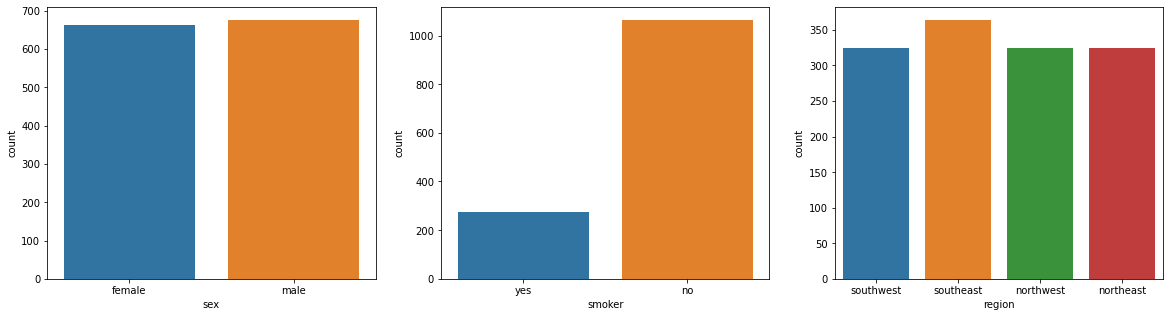

In [7]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,3,1)
sns.countplot(data = df,x = 'sex',ax=ax1)

ax2 = fig.add_subplot(1,3,2)
sns.countplot(data = df,x ='smoker',ax=ax2)

ax3 = fig.add_subplot(1,3,3)
sns.pplot(data = df, x = 'region', ax=ax3)
#visualize the count of categorical data

# The counts of feamle and male are very similar. While most of people aren't the smoker. And most of people comes from southeast.

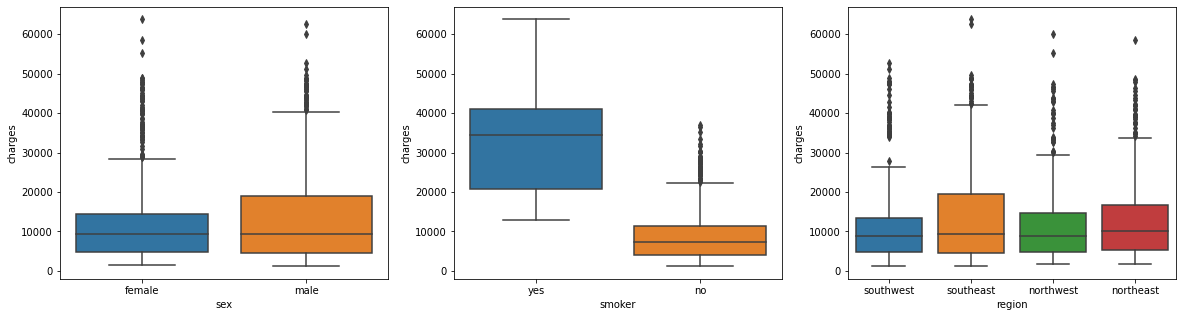

In [8]:
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(data = df, x='sex',y= 'charges',ax=ax1)
ax2 = fig.add_subplot(1,3,2)
sns.boxplot(data = df, x = 'smoker', y = 'charges', ax=ax2)
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(data = df, x = 'region', y = 'charges', ax=ax3)

# Smoker will get more mean insurance charges than who aren't the smoker

C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002816A396910>,
      dtype=object)

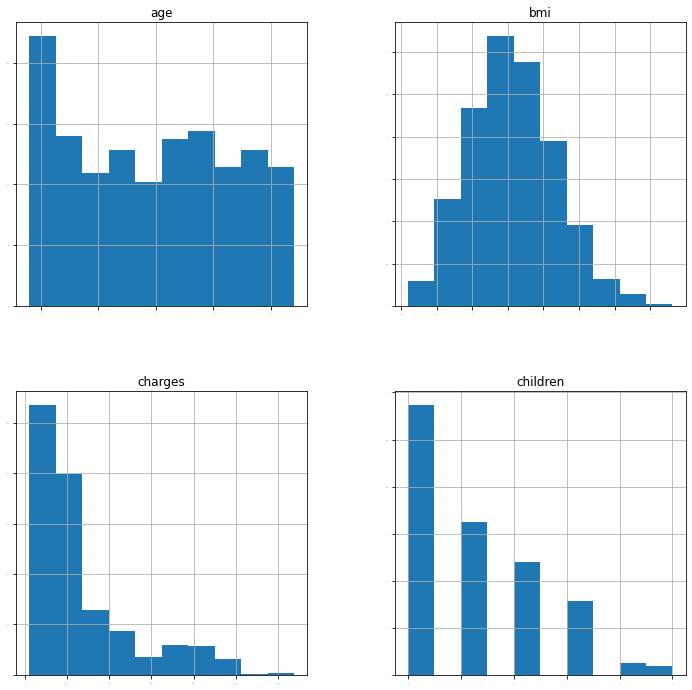

In [9]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))  
# show the data distribution

C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002816A500CA0>,
      dtype=object)

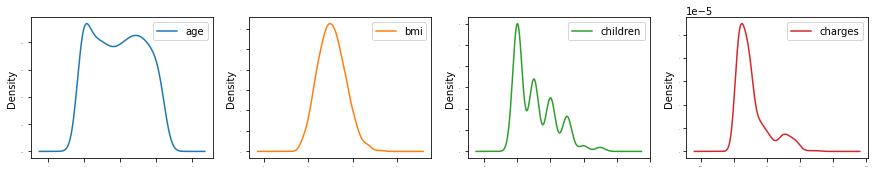

In [10]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))

#visualize the density of data

C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning

age            AxesSubplot(0.125,0.749828;0.168478x0.130172)
bmi         AxesSubplot(0.327174,0.749828;0.168478x0.130172)
children    AxesSubplot(0.529348,0.749828;0.168478x0.130172)
charges     AxesSubplot(0.731522,0.749828;0.168478x0.130172)
dtype: object

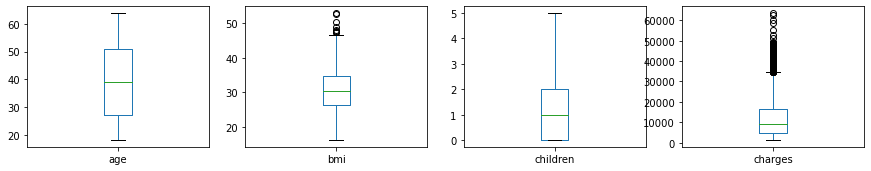

In [11]:
df.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(15,15))

# The box plot show the mean, percentile, maximum and minimum of each columns. We could find that the bmi and charges get some outliers and we need to get rid of it

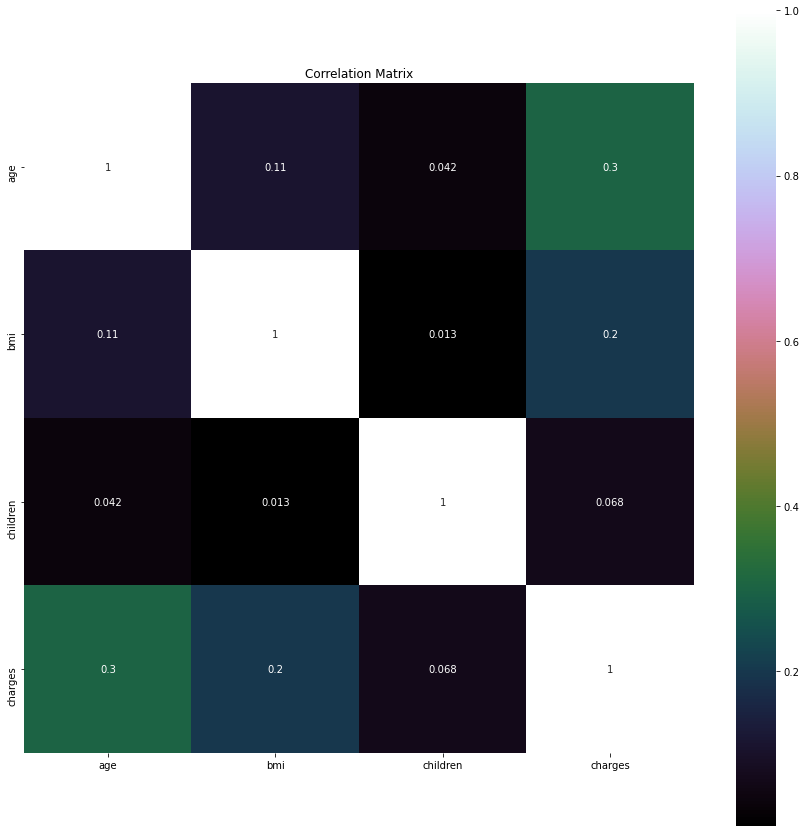

In [12]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
# shows the correlation of each variables

# the correlation between charges and other variables are all positive. So the charges would change with the same direction with other vairables. For example, if the client has a higher bmi, then the charges would be higher too.

<Figure size 1080x1080 with 0 Axes>

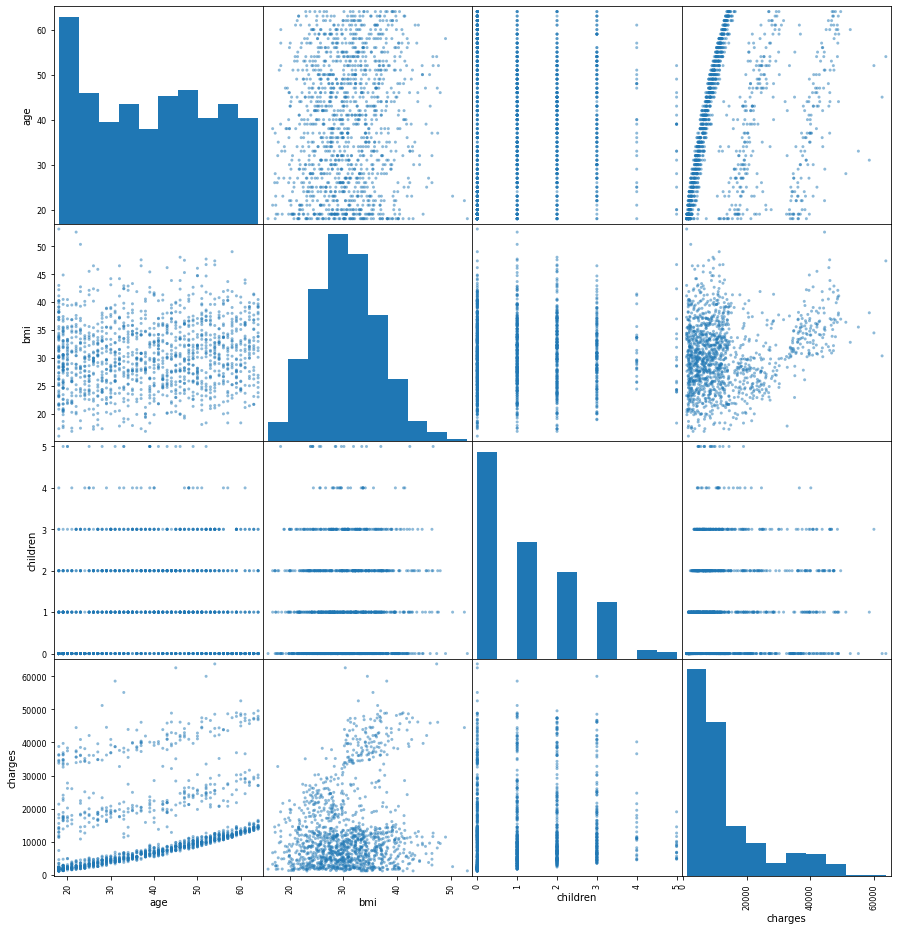

In [13]:
pyplot.figure(figsize=(15,15))
scatter_matrix(df,figsize=(15,16))
pyplot.show()

In [14]:
df=pd.get_dummies(df, prefix=['sex', 'smoker','region'])
df # convert categorical variables to dummies variables

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


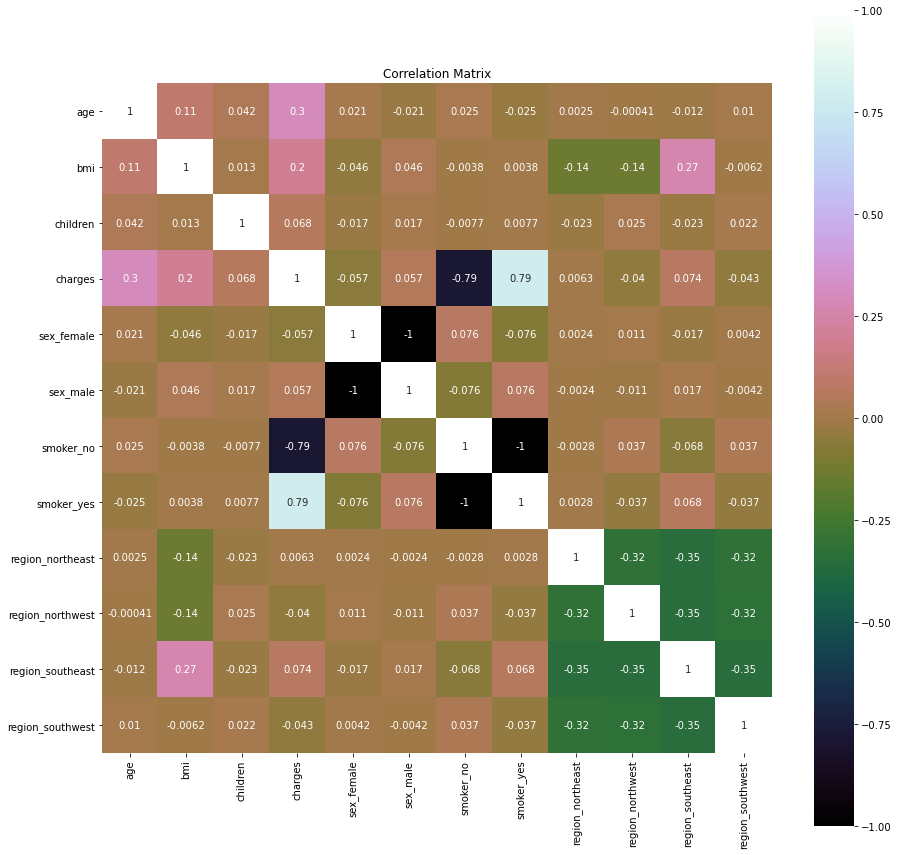

In [15]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
# shows the correlation of each variables. this time adds dummy variables

# we can focus on the correlation between charges and dummy variables. If the correlation is negative, that means if the clients attribute to that categorical, the charges will decrease. For example, if the clinet doesn't smoke, then the charges would go lower

# Preprocess the data

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [17]:
df.shape

(1338, 12)

In [18]:
df = df[(df['charges'] >= df['charges'].quantile(0.01)) & (df['charges'] <= df['charges'].quantile(0.99))]
df = df[(df['bmi'] >= df['bmi'].quantile(0.01)) & (df['bmi'] <= df['bmi'].quantile(0.99))]
#filter out the outliers. Only left the data larger than 1% percentile and smaller than 99% percentile

In [19]:
df.shape

(1282, 12)

In [20]:
# It can be seen that the data has been reduced a few rows with possible outliers.

In [21]:
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.00000,1282.00000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,39.437598,30.524910,1.105304,13002.714316,0.50234,0.49766,0.801872,0.198128,0.244930,0.248050,0.262090,0.244930
std,13.940867,5.645036,1.209765,11386.950961,0.50019,0.50019,0.398745,0.398745,0.430213,0.432049,0.439943,0.430213
min,18.000000,17.955000,0.000000,1253.936000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4839.916763,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.250000,1.000000,9401.175500,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.390000,2.000000,16443.294663,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,45.900000,5.000000,48517.563150,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standarlization the whole datasets including dummt variables

In [22]:
scaler= preprocessing.StandardScaler().fit(df) #fit scaler for standarlization
df_stand=scaler.transform(df)
df_stand=pd.DataFrame(df_stand,columns=df.columns)
df_stand

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.466593,-0.465176,-0.914008,0.341068,0.995331,-0.995331,-2.011776,2.011776,-0.569544,-0.574348,-0.595970,1.755791
1,-1.538352,0.575082,-0.087079,-0.990745,-1.004691,1.004691,0.497073,-0.497073,-0.569544,-0.574348,1.677938,-0.569544
2,-0.820757,0.438625,1.566780,-0.751438,-1.004691,1.004691,0.497073,-0.497073,-0.569544,-0.574348,1.677938,-0.569544
3,-0.461959,-1.385813,-0.914008,0.789084,-1.004691,1.004691,0.497073,-0.497073,-0.569544,1.741105,-0.595970,-0.569544
4,-0.533719,-0.291504,-0.914008,-0.802623,-1.004691,1.004691,0.497073,-0.497073,-0.569544,1.741105,-0.595970,-0.569544
...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.757953,0.078877,1.566780,-0.211040,-1.004691,1.004691,0.497073,-0.497073,-0.569544,1.741105,-0.595970,-0.569544
1278,-1.538352,0.247232,-0.914008,-0.948537,0.995331,-0.995331,0.497073,-0.497073,1.755791,-0.574348,-0.595970,-0.569544
1279,-1.538352,1.120907,-0.914008,-0.999154,0.995331,-0.995331,0.497073,-0.497073,-0.569544,-0.574348,1.677938,-0.569544
1280,-1.323074,-0.837329,-0.914008,-0.965935,0.995331,-0.995331,0.497073,-0.497073,-0.569544,-0.574348,-0.595970,1.755791


In [23]:
X = df_stand.iloc[:,df_stand.columns!='charges']
Y=df_stand['charges']
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #spilt the train and test dataset 

In [24]:
#test options for regression
num_folds = 10
scoring = 'r2'

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Build models

In [26]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))

In [27]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) #see the performance on each models
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.734877 (0.054066)
LASSO: 0.020533 (0.020399)
EN: -0.266895 (0.021292)
KNN: -0.761840 (0.045733)
DTR: -0.700579 (0.054296)
RFR: -0.827167 (0.052638)


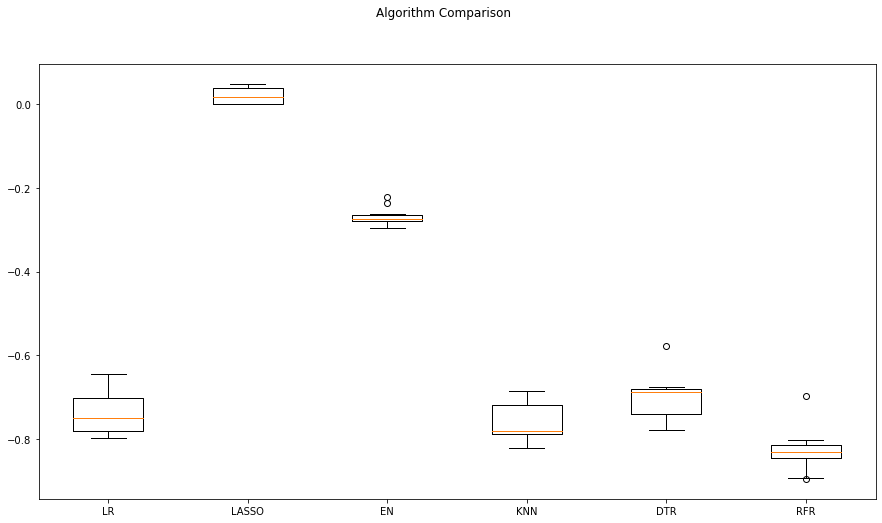

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

# It can be seen that the Random Forest algorithm shows a better performance among these algorithm

In [29]:
X_crosstrain, X_vail, Y_crosstrain,Y_vail = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)
# spilt the train data into another train set and validation set for cross-validation

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,50,100],'max_depth':range(2,10),'min_samples_leaf':range(2,10)} # set the range of tuning parameters 
model=RandomForestRegressor(n_jobs=-1,random_state=0)
GR=GridSearchCV(model,param_grid=param_grid)
RS=GR.fit(X_crosstrain,Y_crosstrain) # fit the model with cross-train data
print(RS.best_params_) # print the best parameters in the range
print(r2_score(Y_vail,RS.predict(X_vail)))

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
0.9269317207987995


#  The r2 score of the model in cross-validation tuning is 0.926. And we could get the best paramters: max_depth=4, min_samples_leaf=5 and n_estimators=100. Then we should use the parameters in the following model fitting.

In [31]:
rfr = RandomForestRegressor(n_estimators =100,max_depth=4 ,min_samples_leaf=5) #use the best parameters found above to fit the model
rfr.fit(X_train, Y_train)
predictions_train = rfr.predict(X_train) #in-sample test
print('In sample r2 score is:',r2_score(Y_train, predictions_train))
predictions = rfr.predict(X_test)# out-of sample test
print('Out of sample r2 score is:',r2_score(Y_test, predictions)) 

In sample r2 score is: 0.8665495825832303
Out of sample r2 score is: 0.8386142894694953


# The model get 0.869 in in-sample data and 0.839 in out-of-sample data.

In [49]:
result = mean_squared_error(Y_test, predictions)
print('MSE of model prediction is:',result)

MSE of model prediction is: 0.1764350148687705


[1.24093156e-01 1.63739311e-01 9.41120282e-03 1.99464820e-05
 1.76852655e-05 2.94451842e-01 4.06054115e-01 1.15072409e-03
 2.11086610e-04 3.01709483e-04 5.49220728e-04]


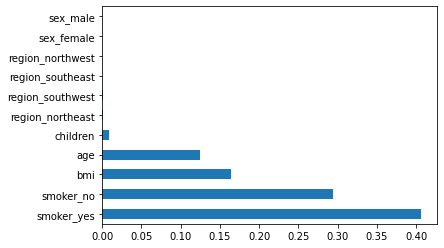

In [32]:
print(rfr.feature_importances_)
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')# shows the ranking of features importance
plt.show()

# The plot is the ranking of features importance on target. Smoker, bmi and age contribute main importance on deciding insurance charges. Especially the features smoker_yes has larger influence on charges compared to smoker_no.
# The plot also shows that the information of region and sex contribute just a little to charges.

In [64]:
data={'Y':Y_test,'Predict':RS.predict(X_test)}
result=pd.DataFrame(data)
result=result.reset_index()
result=result.drop(columns=['index'])
result

,Y,Predict
0,-0.594282,-0.530651
1,2.916604,2.559218
2,1.111693,-0.176151
3,-0.831540,-0.572124
4,-0.372279,-0.214531
...,...,...
252,2.380949,2.340548
253,-0.167721,0.046744
254,0.392380,0.473542
255,-0.640794,-0.453053


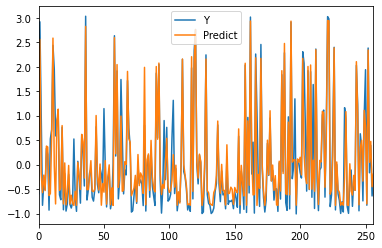

In [65]:
result.plot()

# Also see the difference between charges in data and prediction from model

#  Standarlize the data without Dummy Variables

In [34]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [35]:
variable=['age','bmi','children','charges']
for i in variable:
    df[i]=(df[i]-np.mean(df[i]))/np.std(df[i]) #Just standarlize the four columns

In [36]:
X = df.iloc[:,df.columns!='charges']
Y=df['charges']
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #spilt train and test dataset

In [37]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))

In [38]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.733725 (0.053657)
LASSO: 0.020533 (0.020399)
EN: 0.020533 (0.020399)
KNN: -0.715932 (0.054563)
DTR: -0.679071 (0.062843)
RFR: -0.826373 (0.053883)


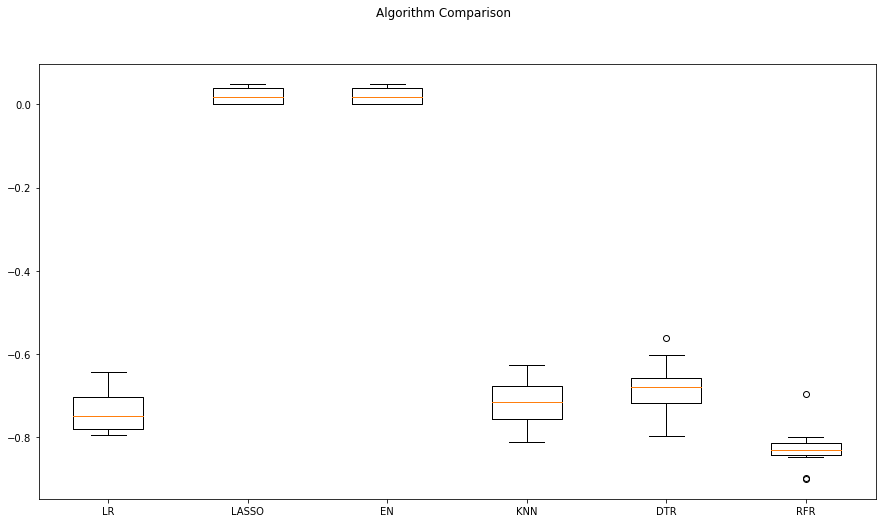

In [39]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

# The Random Forest still has the better performance

In [40]:
X_crosstrain, X_vail, Y_crosstrain,Y_vail = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)
param_grid = {'n_estimators':[10,50,100],'max_depth':range(2,10),'min_samples_leaf':range(2,10)} # set the range of tuning parameters 
model=RandomForestRegressor(n_jobs=-1,random_state=0)
GR=GridSearchCV(model,param_grid=param_grid)
RS=GR.fit(X_crosstrain,Y_crosstrain) # fit the model with cross-train data
print(RS.best_params_) # print the best parameters in the range
print(r2_score(Y_vail,RS.predict(X_vail)))

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
0.9269317207987995


# The best parameters are the same

In [41]:
rfr = RandomForestRegressor(n_estimators =100,max_depth=4 ,min_samples_leaf=5) #use the best parameters found above to fit the model
rfr.fit(X_train, Y_train)
predictions_train = rfr.predict(X_train)
print('In sample r2 score is:',r2_score(Y_train, predictions_train))
predictions = rfr.predict(X_test)
print('Out of sample r2 score is:',r2_score(Y_test, predictions)) 

In sample r2 score is: 0.866882875209583
Out of sample r2 score is: 0.8398898568430231


In [48]:
result = mean_squared_error(Y_test, predictions)
print('MSE of model prediction is:',result)

MSE of model prediction is: 0.1764350148687705


[1.23208201e-01 1.61866234e-01 9.08669987e-03 2.89273210e-05
 1.51435530e-05 3.86354239e-01 3.17464447e-01 1.20263144e-03
 1.58865433e-04 3.77412840e-04 2.37198336e-04]


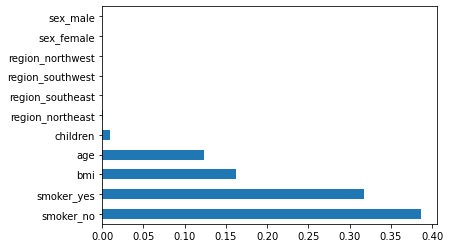

In [42]:
print(rfr.feature_importances_)
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# The features importance plot also the same as above

In [43]:
data={'Y':Y_test,'Predict':RS.predict(X_test)}
result=pd.DataFrame(data)
result=result.reset_index()
result=result.drop(columns=['index'])
result

,Y,Predict
931,-0.594282,-0.530651
674,2.916604,2.559218
520,1.111693,-0.176151
212,-0.831540,-0.572124
1013,-0.372279,-0.214531
...,...,...
682,2.380949,2.340548
1172,-0.167721,0.046744
604,0.392380,0.473542
1064,-0.640794,-0.453053


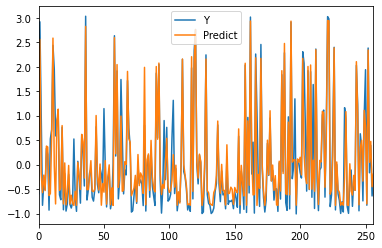

In [66]:
result.plot()